# Tutorial 6: Biomedical Imaging with Machine Learning
**By Guillermo Martin**

Hi everyone, welcome to our last tutorial! Today we are going to give you some pointers to help you get started with biomedical imaging research.
## Grand Challenge (www.grand-challenge.org)
Grand challenge is a platform with lots of biomedical imaging competitions where machine learning is involved. For our project, we will split you into teams, organize a mini-competition similar to the ones found in Grand Challenge and Kaggle (see later), and try to push some performance benchmarks.

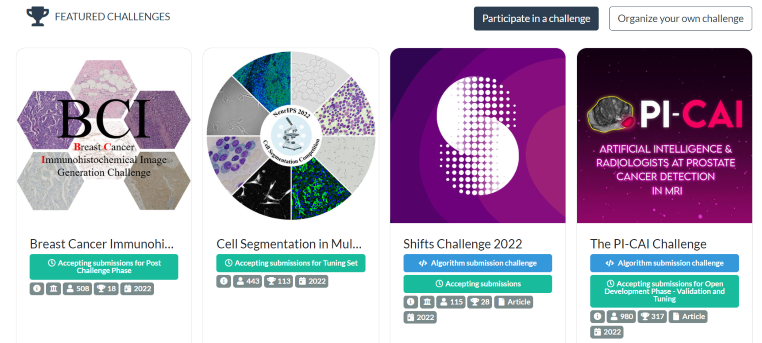

## Kaggle (www.kaggle.com/)
Kaggle is a data science platform with many open-source datasets, models and competitions. If you are interested in data science, we highly encourage you to delve deeper into this platform.
### Melanoma Detection Dataset
We will focus on a skin lesion dataset from kaggle: https://www.kaggle.com/datasets/wanderdust/skin-lesion-analysis-toward-melanoma-detection .

This dataset contains images of different skin lessions, and we will be interested in classifying whether a certain image of a skin lession corresponds to a melanoma or not. For a more complete description of the dataset, check the Kaggle link.


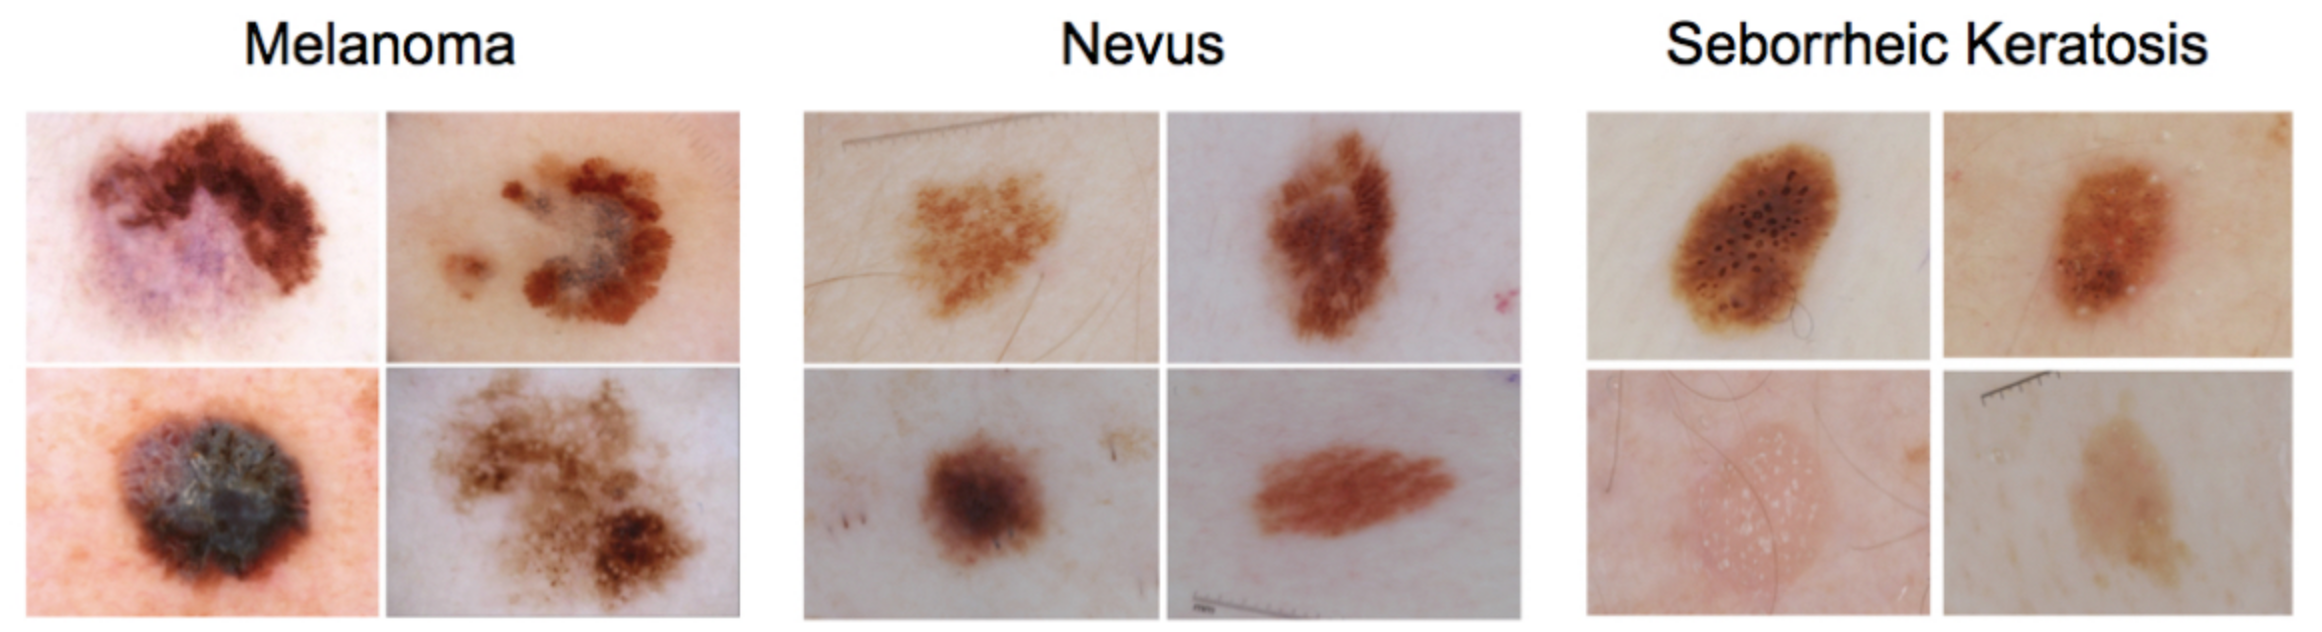

Now we will provide an example model for this task, based on the notebook from mdriponmiah: www.kaggle.com/code/mdriponmiah/medical-image-classification-using-alexnet. You are encouraged to look for more notebooks working with this dataset (https://www.kaggle.com/datasets/wanderdust/skin-lesion-analysis-toward-melanoma-detection/code)



In [ ]:
from tensorflow.keras.layers import Conv2D, Convolution2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential()

#1st convolutional layer
model.add(Convolution2D(96, 11,padding = "valid",strides =(4, 4),input_shape = (224, 224, 3),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())

#2nd convolutional layer
model.add(Convolution2D(256, 5,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())

#3rd convolutional layer
model.add(Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(BatchNormalization())

#4th convolutional layer
model.add(Convolution2D(384, 3,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(BatchNormalization())

#5th convolutional layer
model.add(Convolution2D(256, 3,padding = "valid",strides =(1, 1),activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3),strides = (2, 2),padding="valid"))
model.add(BatchNormalization())

#Flatten Layer
model.add(Flatten())

#1st dense layer
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#2nd dense layer
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#3rd dense layer
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#Final layer
model.add(Dense(3, activation="softmax")) #softmax applied instead of sigmoid when there are more than 2 classes!

2022-12-13 09:06:02.560781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 09:06:02.561897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 09:06:02.906429: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 09:06:02.907336: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 09:06:02.908217: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9, decay = 0.005),
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [ ]:
datasets_directory = "../input/skin-lesion-analysis-toward-melanoma-detection/skin-lesions/"

In [ ]:
batch_size = 128

In [ ]:
train_dataGenerator = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range=0.2,
                                         width_shift_range=0.2,height_shift_range=0.2,fill_mode="nearest")

validation_dataGenerator = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Load the datasets from the folder
trainDatasets = train_dataGenerator.flow_from_directory(datasets_directory+"/train",
                                                       target_size=(224, 224),
                                                       batch_size=batch_size,
                                                       class_mode="categorical")

validationDatasets = validation_dataGenerator.flow_from_directory(datasets_directory+"/valid",
                                                       target_size=(224, 224),
                                                       batch_size=batch_size,
                                                       class_mode="categorical")


Found 2000 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [ ]:
classInformation = trainDatasets.class_indices
print("Class Information: {}".format(classInformation))
classes = list(classInformation)
print("Class Names: {}".format(classes))

Class Information: {'melanoma': 0, 'nevus': 1, 'seborrheic_keratosis': 2}
Class Names: ['melanoma', 'nevus', 'seborrheic_keratosis']


In [ ]:
classSamplesT = trainDatasets.samples
print("Training Data Samples: {}".format(classSamplesT))
classSamplesV = validationDatasets.samples
print("Validation Data Samples: {}".format(classSamplesV))

Training Data Samples: 2000
Validation Data Samples: 150


In [ ]:
weghtPath = "best_weights_9.hdf5"
checkPoint = ModelCheckpoint(weghtPath, monitor="val_acc", verbose = 1, save_best_only = True, save_weghts_only = True, mode = "max")
callBacksList = [checkPoint]

In [ ]:
history = model.fit(trainDatasets,
                   steps_per_epoch = classSamplesT//batch_size,
                   validation_data=validationDatasets,
                   epochs=20,
                   validation_steps=classSamplesV//batch_size,
                   callbacks=callBacksList)

##Performance metrics


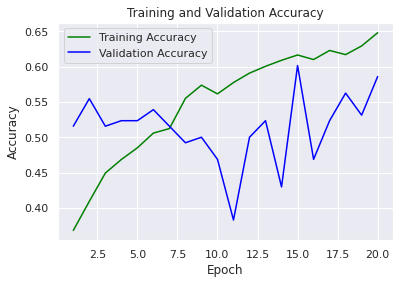

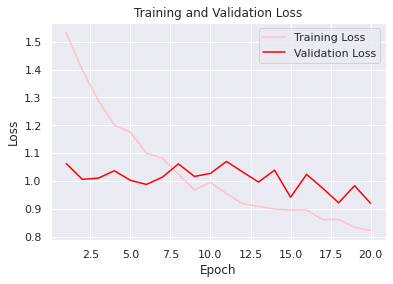

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

##Exercise
Write up a model for this dataset based on one of the available code solutions from Kaggle (https://www.kaggle.com/datasets/wanderdust/skin-lesion-analysis-toward-melanoma-detection/code)

##More resources
There are many freely available resources to learn machine learning, deep learning, image processing and biomedical imaging. But note that the best way to learn Machine Learning is by solving real problems by yourself. There is no amount of passive reading that would replace practical experience.

Here are some resources that could be useful for the project and/or learning more about ML and biomedical imaging:

-Bishop, Christopher M., and Nasser M. Nasrabadi. **Pattern recognition and machine learning**. Vol. 4. No. 4. New York: springer, 2006.

-Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. **Deep learning**. MIT press, 2016.

-Dildar, Mehwish, et al. **Skin cancer detection: a review using deep learning techniques**. International journal of environmental research and public health 18.10, 2021.